<a href="https://colab.research.google.com/github/pranaviii04/Machine-Learning-Labs/blob/main/Logistic_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<h2 align="center"> Logistic Regression </h2>

In [6]:
from google.colab import files
uploaded = files.upload()


Saving DMV_Written_Tests.csv to DMV_Written_Tests (1).csv


### Task 2: Load the Data and Libraries
---

In [7]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
plt.style.use("ggplot")
%matplotlib inline

In [8]:
from pylab import rcParams
rcParams['figure.figsize'] = 12, 8

In [11]:
df = pd.read_csv("DMV_Written_Tests.csv")
df.head()

,DMV_Test_1,DMV_Test_2,Results
0,34.623660,78.024693,0
1,30.286711,43.894998,0
2,35.847409,72.902198,0
3,60.182599,86.308552,1
4,79.032736,75.344376,1


In [17]:
print(df.info())
print(df.describe())
print(df.isnull().sum())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   DMV_Test_1  100 non-null    float64
 1   DMV_Test_2  100 non-null    float64
 2   Results     100 non-null    int64  
dtypes: float64(2), int64(1)
memory usage: 2.5 KB
None
       DMV_Test_1  DMV_Test_2     Results
count  100.000000  100.000000  100.000000
mean    65.644274   66.221998    0.600000
std     19.458222   18.582783    0.492366
min     30.058822   30.603263    0.000000
25%     50.919511   48.179205    0.000000
50%     67.032988   67.682381    1.000000
75%     80.212529   79.360605    1.000000
max     99.827858   98.869436    1.000000
DMV_Test_1    0
DMV_Test_2    0
Results       0
dtype: int64


### Task 3: Visualize the Data
---

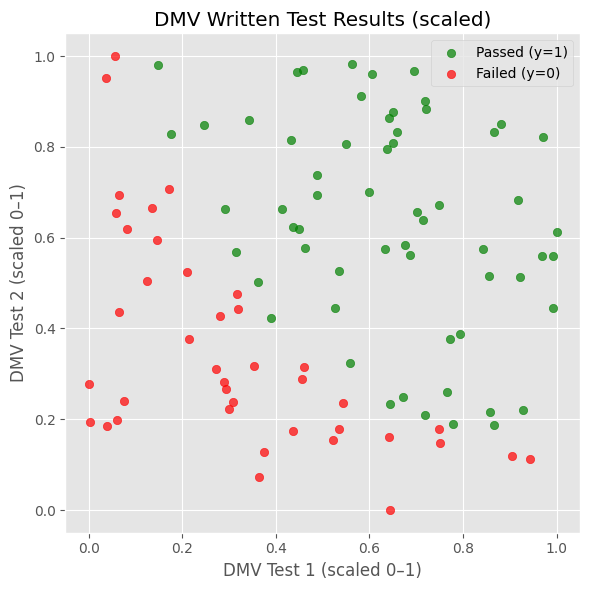

In [25]:
# Min-max scaling
def minmax(a: np.ndarray):
    return (a - a.min()) / (a.max() - a.min())

# Scale the two test scores
test1 = minmax(df['DMV_Test_1'].values)
test2 = minmax(df['DMV_Test_2'].values)

# Target: 1 = Passed, 0 = Failed
y = df['Results'].values.astype(float)

# Combine into feature matrix
X = np.column_stack([test1, test2])  # shape (n, 2)

# Scatter plot
plt.figure(figsize=(6,6))
plt.scatter(X[y==1,0], X[y==1,1], label='Passed (y=1)', alpha=0.7, c='green')
plt.scatter(X[y==0,0], X[y==0,1], label='Failed (y=0)', alpha=0.7, c='red')
plt.xlabel('DMV Test 1 (scaled 0–1)')
plt.ylabel('DMV Test 2 (scaled 0–1)')
plt.legend()
plt.title('DMV Written Test Results (scaled)')
plt.tight_layout()
plt.show()

### Task 4: Define the Logistic Sigmoid Function $\sigma(z)$
---

$$ \sigma(z) = \frac{1}{1+e^{-z}}$$

In [26]:
def sigmoid(z):
  return 1.0 / (1.0 + np.exp(-z))

### Task 5: Compute the Cost Function $J(\theta)$ and Gradient
---

The objective of logistic regression is to minimize the cost function

$$J(\theta) = -\frac{1}{m} \sum_{i=1}^{m} [ y^{(i)}log(h_{\theta}(x^{(i)})) + (1 - y^{(i)})log(1 - (h_{\theta}(x^{(i)}))]$$

where the gradient of the cost function is given by

$$ \frac{\partial J(\theta)}{\partial \theta_j} = \frac{1}{m} \sum_{i=1}^{m} (h_{\theta}(x^{(i)}) - y^{(i)})x_j^{(i)}$$

In [31]:
# Cost function J(theta)
def compute_cost(theta, X, y):
    """
    theta: parameter vector (d,)
    X: feature matrix (m, d)
    y: labels (m,)
    """
    m = len(y)
    h = sigmoid(X @ theta)  # hypothesis: vector of predictions
    # Avoid log(0) by adding a tiny epsilon
    epsilon = 1e-9
    return (1/m) * np.sum(y * np.log(h + epsilon) + (1 - y) * np.log(1 - h + epsilon))


 # Gradient of cost function
def compute_gradient(theta, X, y):
    """
    Returns gradient (d,)
    """
    m = len(y)
    h = sigmoid(X @ theta)
    return (1/m) * (X.T @ (h - y))


### Task 6: Cost and Gradient at Initialization
---

In [35]:
# --- Task 6: Cost & Gradient at Initialization ---
# Add bias term to features (X is your scaled feature matrix with shape (m,2))
X_bias = np.column_stack([np.ones(X.shape[0]), X])  # shape (m, 3)

# Initialize theta = 0
theta_init = np.zeros(X_bias.shape[1])  # shape (3,)

# Compute cost and gradient
J0 = compute_cost(theta_init, X_bias, y)
grad0 = compute_gradient(theta_init, X_bias, y)

print("Task 6: Cost at initialization (theta=0):", J0)
print("Task 6: Gradient at initialization:\n", grad0)

Task 6: Cost at initialization (theta=0): -0.6931471785599451
Task 6: Gradient at initialization:
 [-0.1        -0.12904484 -0.12015491]


### Task 7: Gradient Descent
---

Minimize the cost function $J(\theta)$ by updating the below equation and repeat until convergence
$\theta_j := \theta_j - \alpha \frac{\partial J(\theta)}{\partial \theta_j}$ (simultaneously update $\theta_j$ for all $j$)

In [ ]:
def gradient_descent(X, y, alpha=0.1, num_iters=1000):
    """
    Performs gradient descent to minimize cost J(theta).

    X: feature matrix (m, d) with bias term included
    y: labels (m,)
    alpha: learning rate
    num_iters: number of iterations

    Returns:
        theta: learned parameters
        J_history: list of cost values
    """
    m, d = X.shape
    theta = np.zeros(d)   # initialize parameters
    J_history = []        # track cost over iterations

    for i in range(num_iters):
        # Hypothesis
        h = sigmoid(X @ theta)

        # Gradient
        gradient = (1/m) * (X.T @ (h - y))

        # Update rule (simultaneously update all theta_j)
        theta = theta - alpha * gradient

        # Save cost for analysis
        cost = compute_cost(theta, X, y)
        J_history.append(cost)

        # Optional: print progress
        # if i % 100 == 0:
        #     print(f"Iteration {i}, Cost: {cost:.4f}")

    return theta, J_history


In [37]:
# Run gradient descent
theta_final, J_history = gradient_descent(X_bias, y, alpha=0.1, num_iters=1000)

print("Final parameters (theta):", theta_final)
print("Final cost:", J_history[-1])


Iteration 0, Cost: -0.6891
Iteration 100, Cost: -0.5903
Iteration 200, Cost: -0.5444
Iteration 300, Cost: -0.5071
Iteration 400, Cost: -0.4766
Iteration 500, Cost: -0.4512
Iteration 600, Cost: -0.4300
Iteration 700, Cost: -0.4119
Iteration 800, Cost: -0.3964
Iteration 900, Cost: -0.3830
Final parameters (theta): [-2.58740924  3.3307837   2.91270443]
Final cost: -0.3713254674189693


### Task 8: Plotting the Convergence of $J(\theta)$
---

Plot $J(\theta)$ against the number of iterations of gradient descent:

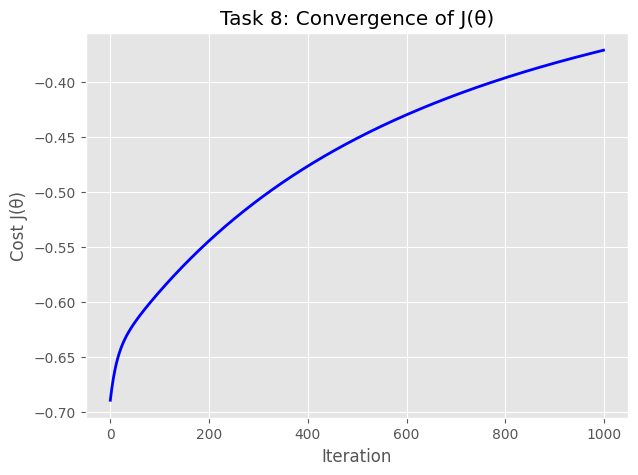

In [38]:
# Plot convergence of cost function
plt.figure(figsize=(7,5))
plt.plot(range(len(J_history)), J_history, color="blue", linewidth=2)
plt.xlabel("Iteration")
plt.ylabel("Cost J(θ)")
plt.title("Task 8: Convergence of J(θ)")
plt.grid(True)
plt.show()

### Task 9: Plotting the decision boundary
---

$h_\theta(x) = \sigma(z)$, where $\sigma$ is the logistic sigmoid function and $z = \theta^Tx$

When $h_\theta(x) \geq 0.5$ the model predicts class "1":

$\implies \sigma(\theta^Tx) \geq 0.5$

$\implies \theta^Tx \geq 0$ predict class "1"

Hence, $\theta_1 + \theta_2x_2 + \theta_3x_3 = 0$ is the equation for the decision boundary, giving us

$ x_3 = \frac{-(\theta_1+\theta_2x_2)}{\theta_3}$

### Task 10: Predictions using the optimized $\theta$ values
---

$h_\theta(x) = x\theta$